In [1]:
import numpy as np
DTYPE = np.float64
import matplotlib.pyplot as plt
import pickle
import os
from tqdm import tqdm
import sys
sys.path.insert(0, "../../packages")
import gzip

In [2]:
# Flory Huggins Free Energy function
def floryHuggins(phi:DTYPE, chi:np.array):
    part_1 = np.sum(phi*np.log(phi))
    part_2 = 0

    for i in range(len(phi)):
        for j in range(i+1, len(phi)):
            part_2 += chi[i][j]*phi[i]*phi[j]

    return part_1 + part_2

In [3]:
phi_globals = [
              # np.array([0.1, 0.2, 0.3, 0.4], dtype=DTYPE),
              # np.array([0.1, 0.2, 0.4, 0.3], dtype=DTYPE),
              # np.array([0.1, 0.3, 0.2, 0.4], dtype=DTYPE),
              # np.array([0.1, 0.3, 0.4, 0.2], dtype=DTYPE),
              # np.array([0.1, 0.4, 0.2, 0.3], dtype=DTYPE),
              # np.array([0.1, 0.4, 0.3, 0.2], dtype=DTYPE),
              # np.array([0.2, 0.1, 0.3, 0.4], dtype=DTYPE),
              # np.array([0.2, 0.1, 0.4, 0.3], dtype=DTYPE),
              # np.array([0.2, 0.3, 0.1, 0.4], dtype=DTYPE),
              # np.array([0.2, 0.3, 0.4, 0.1], dtype=DTYPE),
              # np.array([0.2, 0.4, 0.3, 0.1], dtype=DTYPE),
              # np.array([0.2, 0.4, 0.1, 0.3], dtype=DTYPE),
              # np.array([0.3, 0.1, 0.2, 0.4], dtype=DTYPE),
              # np.array([0.3, 0.1, 0.4, 0.2], dtype=DTYPE),
              # np.array([0.3, 0.2, 0.1, 0.4], dtype=DTYPE),
              # np.array([0.3, 0.2, 0.4, 0.1], dtype=DTYPE),
              # np.array([0.3, 0.4, 0.1, 0.2], dtype=DTYPE),
              np.array([0.3, 0.4, 0.2, 0.1], dtype=DTYPE),
              # np.array([0.4, 0.1, 0.2, 0.3], dtype=DTYPE),
              # np.array([0.4, 0.1, 0.3, 0.2], dtype=DTYPE),
              # np.array([0.4, 0.2, 0.1, 0.3], dtype=DTYPE),
              # np.array([0.4, 0.2, 0.3, 0.1], dtype=DTYPE),
              # np.array([0.4, 0.3, 0.1, 0.2], dtype=DTYPE),
              # np.array([0.4, 0.3, 0.2, 0.1], dtype=DTYPE)
             ]

Xs = np.arange(1, 10.1, 0.1)

# N_STEPS = [100000]
steps = 100000

In [4]:
initial_guess_phis_4To2 = {}
initial_guess_etas_4To2 = {}
initial_F_4To2 = {}

best_phis_4To2 = {}
best_etas_4To2 = {}
best_F_4To2 = {}


initial_guess_phis_4To3 = {}
initial_guess_etas_4To3 = {}
initial_F_4To3 = {}

best_phis_4To3 = {}
best_etas_4To3 = {}
best_F_4To3 = {}

In [5]:
#######################
# 4->2, combine 2+2
#######################

merged_compartments_set1 = [np.array([1, 2], dtype=np.int64), 
                    np.array([1, 3], dtype=np.int64),
                    np.array([1, 4], dtype=np.int64)]

merged_compartments_set2 = [np.array([3, 4], dtype=np.int64), 
                    np.array([2, 4], dtype=np.int64),
                    np.array([2, 3], dtype=np.int64)]

for merged_compartments in (zip(merged_compartments_set1, merged_compartments_set2)):
    key = (tuple(merged_compartments[0]), tuple(merged_compartments[1]))

    guess_phis_in = []
    guess_etas_in = []
    f_in = []

    phis_best = []
    etas_best = []
    f_best = []
    
    for phi_global in phi_globals:
        for X in tqdm(Xs):

            input_filepath = f"data/withFlory/phi_g{phi_global}/raw/X{X:.3f}/steps{steps}/mergers/4To2_combine2And2/{merged_compartments[0]} {merged_compartments[1]}/"
            input_filename = f"initial_and_best.pkl"
            input_file = os.path.join(input_filepath, input_filename)
            
            with gzip.open(input_file, "rb") as file:
                loaded_data = pickle.load(file)

            guess_phis_in.append(loaded_data["initial_guess"][0])
            guess_etas_in.append(loaded_data["initial_guess"][1])
            
            # key = (tuple(merged_compartments[0]), tuple(merged_compartments[1]))
            f_in.append(loaded_data["F_initial"])

            phis_best.append(loaded_data["best_location"][0])
            etas_best.append(loaded_data["best_location"][1])
            f_best.append(loaded_data["F_best"])

    initial_guess_phis_4To2[key] = guess_phis_in
    initial_guess_etas_4To2[key] = guess_etas_in
    initial_F_4To2[key] = f_in
    
    best_phis_4To2[key] = phis_best
    best_etas_4To2[key] = etas_best
    best_F_4To2[key] = f_best           


#######################
# 4->2, combine 3
#######################

merged_compartments_list = [np.array([1, 2, 3], dtype=np.int64), 
                            np.array([1, 2, 4], dtype=np.int64),
                            np.array([1, 3, 4], dtype=np.int64),
                            np.array([2, 3, 4], dtype=np.int64)]

for merged_compartments in merged_compartments_list:
    key = tuple(merged_compartments)
    guess_phis_in = []
    guess_etas_in = []
    f_in = []

    phis_best = []
    etas_best = []
    f_best = []
    
    for phi_global in phi_globals:
        for X in tqdm(Xs):

            input_filepath = f"data/withFlory/phi_g{phi_global}/raw/X{X:.3f}/steps{steps}/mergers/4To2_combine3/{merged_compartments}/"
            input_filename = f"initial_and_best.pkl"
            input_file = os.path.join(input_filepath, input_filename)
            
            with gzip.open(input_file, "rb") as file:
                loaded_data = pickle.load(file)

            guess_phis_in.append(loaded_data["initial_guess"][0])
            guess_etas_in.append(loaded_data["initial_guess"][1])
            
            # key = (tuple(merged_compartments[0]), tuple(merged_compartments[1]))
            f_in.append(loaded_data["F_initial"])

            phis_best.append(loaded_data["best_location"][0])
            etas_best.append(loaded_data["best_location"][1])
            f_best.append(loaded_data["F_best"])

    initial_guess_phis_4To2[key] = guess_phis_in
    initial_guess_etas_4To2[key] = guess_etas_in
    initial_F_4To2[key] = f_in
    
    best_phis_4To2[key] = phis_best
    best_etas_4To2[key] = etas_best
    best_F_4To2[key] = f_best     


#######################
# 4->3, combine 2
#######################
merged_compartments_list = [np.array([1, 2], dtype=np.int64),
                            np.array([1, 3], dtype=np.int64),
                            np.array([1, 4], dtype=np.int64),
                            np.array([2, 3], dtype=np.int64),
                            np.array([2, 4], dtype=np.int64),
                            np.array([3, 4], dtype=np.int64),
                           ]

for merged_compartments in merged_compartments_list:
    key = tuple(merged_compartments)
    guess_phis_in = []
    guess_etas_in = []
    f_in = []

    phis_best = []
    etas_best = []
    f_best = []
    
    for phi_global in phi_globals:
        for X in tqdm(Xs):

            input_filepath = f"data/withFlory/phi_g{phi_global}/raw/X{X:.3f}/steps{steps}/mergers/4To3_combine2/{merged_compartments}/"
            input_filename = f"initial_and_best.pkl"
            input_file = os.path.join(input_filepath, input_filename)
            
            with gzip.open(input_file, "rb") as file:
                loaded_data = pickle.load(file)

            guess_phis_in.append(loaded_data["initial_guess"][0])
            guess_etas_in.append(loaded_data["initial_guess"][1])
            
            # key = (tuple(merged_compartments[0]), tuple(merged_compartments[1]))
            f_in.append(loaded_data["F_initial"])

            phis_best.append(loaded_data["best_location"][0])
            etas_best.append(loaded_data["best_location"][1])
            f_best.append(loaded_data["F_best"])

    initial_guess_phis_4To3[key] = guess_phis_in
    initial_guess_etas_4To3[key] = guess_etas_in
    initial_F_4To3[key] = f_in
    
    best_phis_4To3[key] = phis_best
    best_etas_4To3[key] = etas_best
    best_F_4To3[key] = f_best     

100%|██████████████████████████████████████████████| 91/91 [00:00<00:00, 8325.48it/s]


In [6]:
####################################
# Get the global bounds for the free energy plots across all reductions
####################################

all_best_F_values = []

merged_compartments_set1 = [np.array([1, 2], dtype=np.int64), 
                    np.array([1, 3], dtype=np.int64),
                    np.array([1, 4], dtype=np.int64)]

merged_compartments_set2 = [np.array([3, 4], dtype=np.int64), 
                    np.array([2, 4], dtype=np.int64),
                    np.array([2, 3], dtype=np.int64)]

for merged_compartments in (zip(merged_compartments_set1, merged_compartments_set2)):
    key = (tuple(merged_compartments[0]), tuple(merged_compartments[1]))
    all_best_F_values.extend(best_F_4To2[key])


merged_compartments_list = [np.array([1, 2, 3], dtype=np.int64), 
                            np.array([1, 2, 4], dtype=np.int64),
                            np.array([1, 3, 4], dtype=np.int64),
                            np.array([2, 3, 4], dtype=np.int64)]

for merged_compartments in merged_compartments_list:
    key = tuple(merged_compartments)
    all_best_F_values.extend(best_F_4To2[key])

merged_compartments_list = [np.array([1, 2], dtype=np.int64),
                            np.array([1, 3], dtype=np.int64),
                            np.array([1, 4], dtype=np.int64),
                            np.array([2, 3], dtype=np.int64),
                            np.array([2, 4], dtype=np.int64),
                            np.array([3, 4], dtype=np.int64),
                           ]

for merged_compartments in merged_compartments_list:
    key = tuple(merged_compartments)
    all_best_F_values.extend(best_F_4To3[key])

global_best_ymin = np.min(all_best_F_values)
global_best_ymax = np.max(all_best_F_values)

padding = 0.05 * (global_best_ymax - global_best_ymin)
global_best_ymin -= padding
global_best_ymax += padding

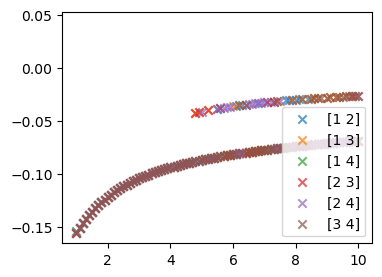

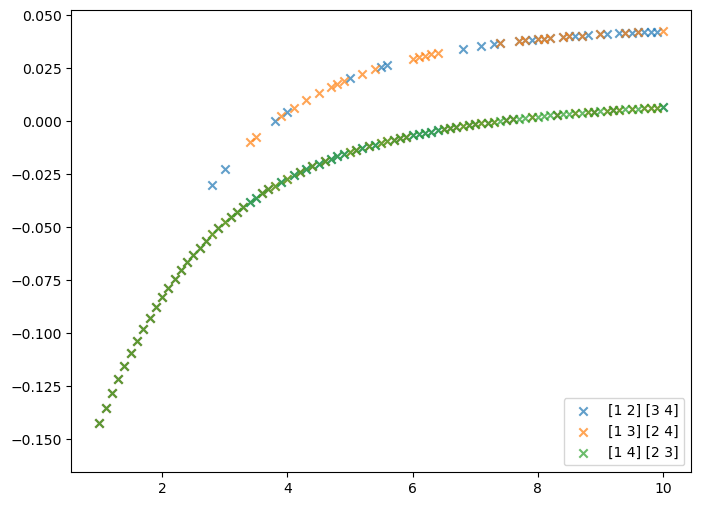

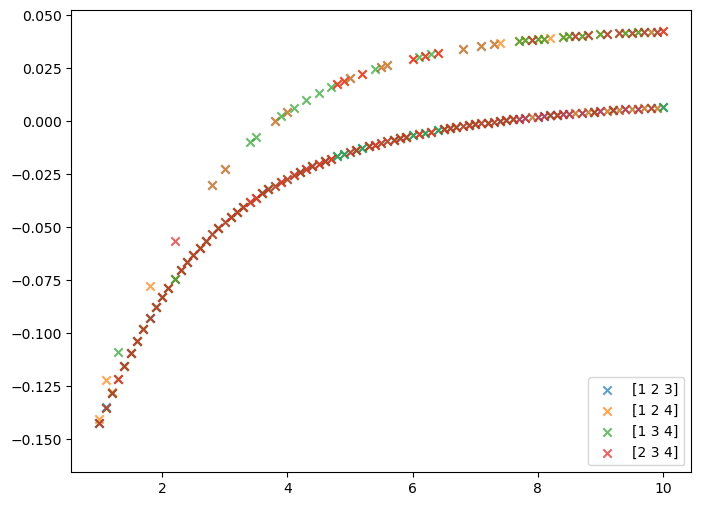

In [8]:
fig, ax = plt.subplots(figsize = (4, 3))
merged_compartments_list = [np.array([1, 2], dtype=np.int64),
                            np.array([1, 3], dtype=np.int64),
                            np.array([1, 4], dtype=np.int64),
                            np.array([2, 3], dtype=np.int64),
                            np.array([2, 4], dtype=np.int64),
                            np.array([3, 4], dtype=np.int64),
                           ]

for merged_compartments in merged_compartments_list:
    key = tuple(merged_compartments)
    ax.scatter(Xs, best_F_4To3[key], label = f"{merged_compartments}", alpha = 0.7, marker = "x")
ax.set_ylim(global_best_ymin, global_best_ymax)
ax.legend(loc = "lower right")





fig, ax = plt.subplots(figsize = (8, 6))
merged_compartments_set1 = [np.array([1, 2], dtype=np.int64), 
                    np.array([1, 3], dtype=np.int64),
                    np.array([1, 4], dtype=np.int64)]

merged_compartments_set2 = [np.array([3, 4], dtype=np.int64), 
                    np.array([2, 4], dtype=np.int64),
                    np.array([2, 3], dtype=np.int64)]

for merged_compartments in (zip(merged_compartments_set1, merged_compartments_set2)):
    key = (tuple(merged_compartments[0]), tuple(merged_compartments[1]))
    ax.scatter(Xs, best_F_4To2[key], label = f"{merged_compartments[0]} {merged_compartments[1]}", alpha = 0.7, marker = "x")
ax.set_ylim(global_best_ymin, global_best_ymax)
ax.legend(loc = "lower right")







fig, ax = plt.subplots(figsize = (8, 6))
merged_compartments_list = [np.array([1, 2, 3], dtype=np.int64), 
                            np.array([1, 2, 4], dtype=np.int64),
                            np.array([1, 3, 4], dtype=np.int64),
                            np.array([2, 3, 4], dtype=np.int64)]

for merged_compartments in merged_compartments_list:
    key = tuple(merged_compartments)
    ax.scatter(Xs, best_F_4To2[key], label = f"{merged_compartments}", alpha = 0.7, marker = "x")
ax.set_ylim(global_best_ymin, global_best_ymax)
ax.legend(loc = "lower right")

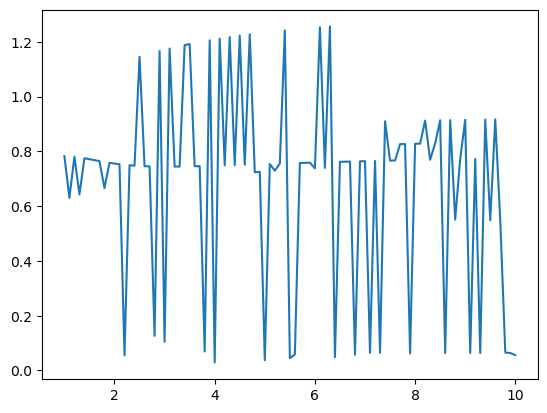

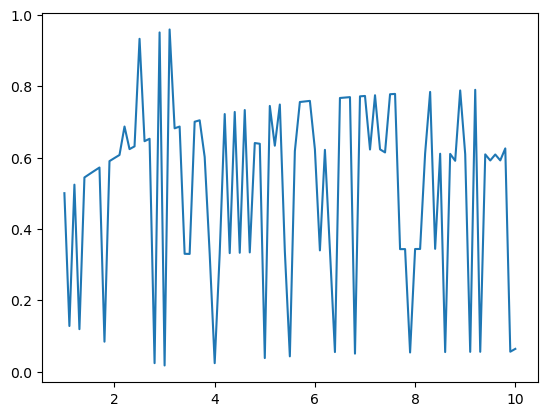

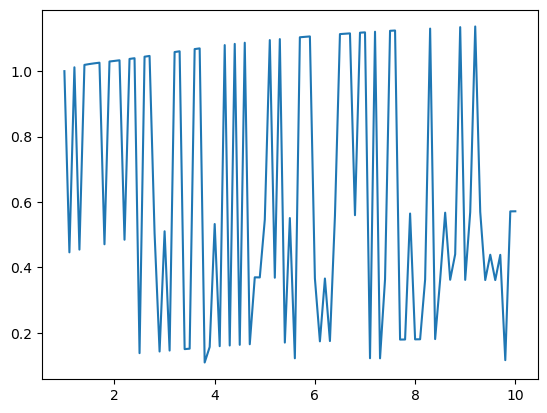

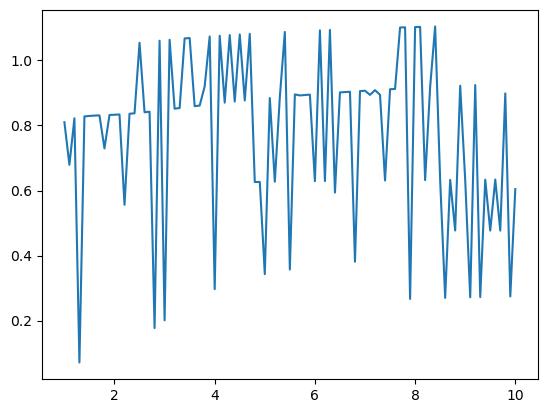

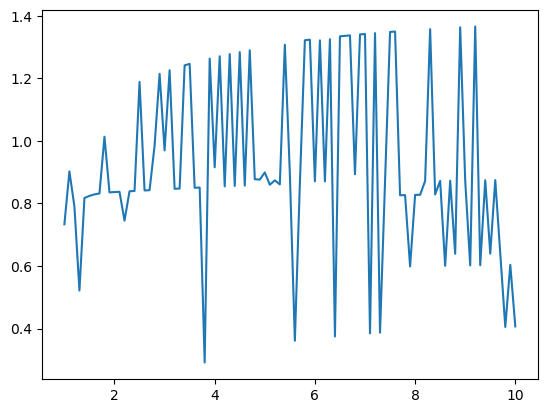

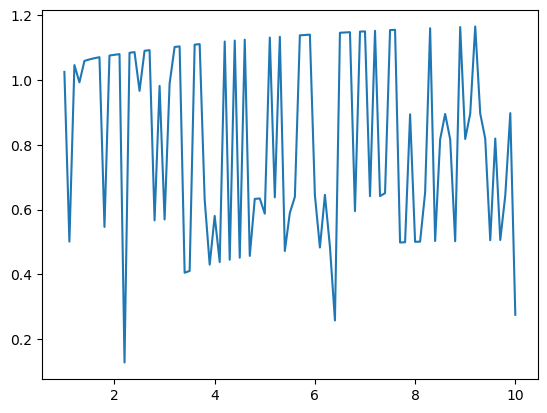

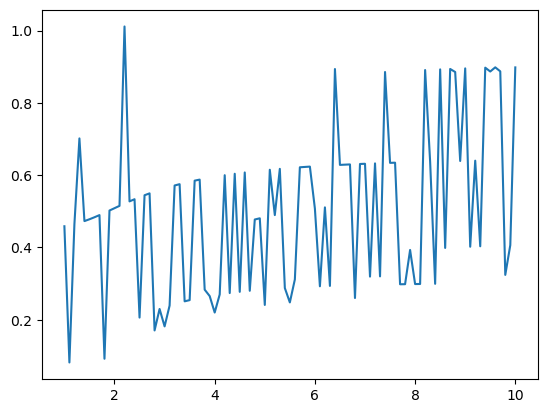

In [24]:
# Measuring distance between the initial and the final guess
# Similarly, for etas

# 4 to 2
for key, val in initial_guess_phis_4To2.items():
    f_norm = []
    fig, ax = plt.subplots()
    for idx, _ in enumerate(initial_guess_phis_4To2[key]):
        frobenius_norm = np.linalg.norm(initial_guess_phis_4To2[key][idx]-best_phis_4To2[key][idx], 'fro')
        f_norm.append(frobenius_norm)
    ax.plot(Xs, f_norm)

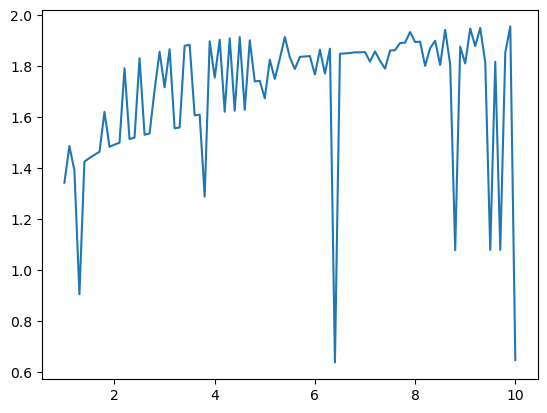

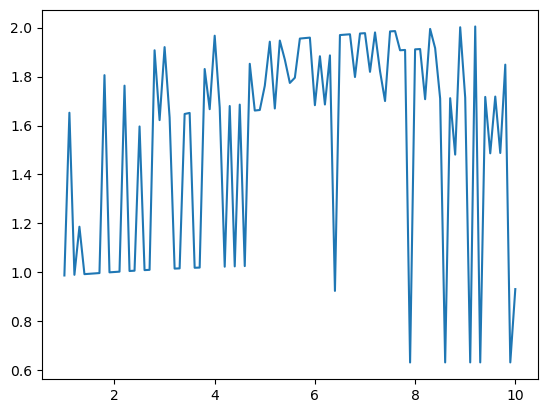

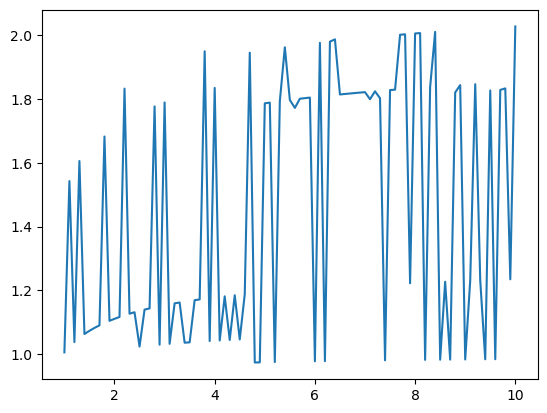

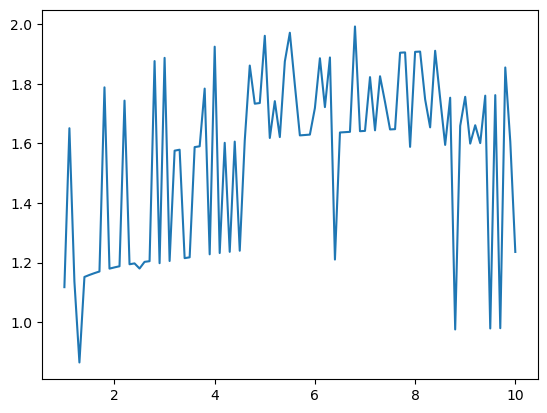

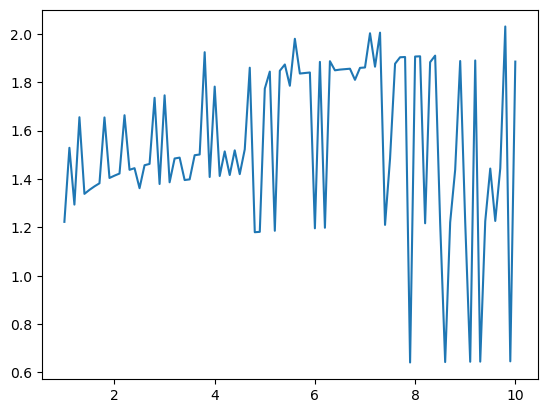

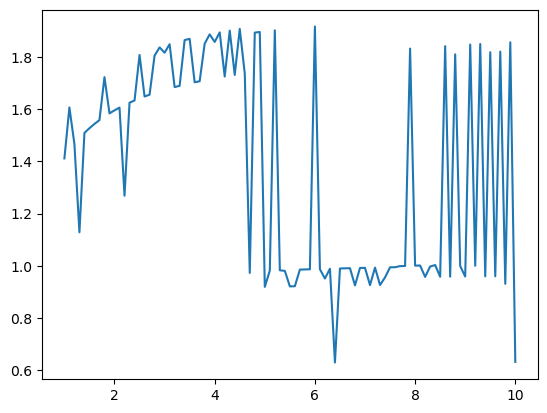

In [25]:
# 4 to 3

for key, val in initial_guess_phis_4To3.items():
    f_norm = []
    fig, ax = plt.subplots()
    for idx, _ in enumerate(initial_guess_phis_4To3[key]):
        frobenius_norm = np.linalg.norm(initial_guess_phis_4To3[key][idx]-best_phis_4To3[key][idx], 'fro')
        f_norm.append(frobenius_norm)
    ax.plot(Xs, f_norm)

In [29]:
# Distance to the best minima for the best merger

#######################
# 4->2, combine 2+2
#######################

merged_compartments_set1 = [np.array([1, 2], dtype=np.int64), 
                    np.array([1, 3], dtype=np.int64),
                    np.array([1, 4], dtype=np.int64)]

merged_compartments_set2 = [np.array([3, 4], dtype=np.int64), 
                    np.array([2, 4], dtype=np.int64),
                    np.array([2, 3], dtype=np.int64)]


for phi_global in phi_globals:
    best_mergers = []
    for X in tqdm(Xs):
        best_f = np.inf
        best_merger = None
        for merged_compartments in zip(merged_compartments_set1, merged_compartments_set2):
            input_filepath = f"data/withFlory/phi_g{phi_global}/raw/X{X:.3f}/steps{steps}/mergers/4To2_combine2And2/{merged_compartments[0]} {merged_compartments[1]}/"
            input_filename = f"initial_and_best.pkl"
            input_file = os.path.join(input_filepath, input_filename)
            
            with gzip.open(input_file, "rb") as file:
                loaded_data = pickle.load(file)

            if loaded_data["F_best"] <= best_f:
                best_f = loaded_data["F_best"]
                best_merger = [merged_compartments[0], merged_compartments[1]]
        best_mergers.append(best_merger)

100%|██████████████████████████████████████████████| 91/91 [00:00<00:00, 2629.13it/s]


In [40]:
for phi_global in phi_globals:
    for X in tqdm(Xs):
        f_norm = []
        
        for merger in best_mergers:
            input_filepath = f"data/withFlory/phi_g{phi_global}/raw/X{X:.3f}/steps{steps}/mergers/4To2_combine2And2/{merger[0]} {merger[1]}/"
            input_filename = f"initial_and_best.pkl"
            input_file = os.path.join(input_filepath, input_filename)
            
            with gzip.open(input_file, "rb") as file:
                loaded_data = pickle.load(file)

            frobenius_norm = np.linalg.norm(loaded_data["initial_guess"][0]-loaded_data["best_location"][0], 'fro')
            f_norm.append(frobenius_norm)
            # print(loaded_data["merged_compartments"])

100%|███████████████████████████████████████████████| 91/91 [00:00<00:00, 102.00it/s]


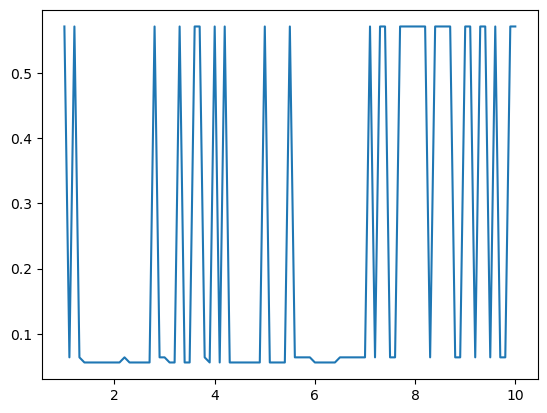

In [43]:
plt.plot(Xs, f_norm)

In [39]:
loaded_data["initial_guess"][0]

array([[0.09951573, 0.25035963, 0.55059278, 0.09953185],
       [0.10096769, 0.09952031, 0.09952434, 0.69998766]])

In [27]:
loaded_data

{'merged_compartments': (array([1, 4]), array([2, 3])),
 'initial_guess': [array([[0.72038489, 0.04352094, 0.04352093, 0.19257324],
         [0.04352114, 0.61748946, 0.29546852, 0.04352088]]),
  array([0.99013279, 1.00986721])],
 'F_initial': np.float64(1.528297414239277),
 'best_location': [array([[5.94045878e-01, 1.60707081e-03, 4.03948906e-01, 3.98134577e-04],
         [1.17002494e-02, 7.90607693e-01, 3.65822863e-05, 1.97655485e-01]]),
  array([0.49506639, 0.50493361])],
 'F_best': np.float64(0.006694972641844363),
 'metadata': {'initial_guess': 'stores the initial merged guesses',
  'F_initial': 'stores the initial free energy for the guess',
  'best_location': "stores flory's output for the local minima positions [phi_flory, eta_flory]",
  'F_best': 'stores the best free energy'}}

In [28]:
np.inf

inf

In [ ]:
# measuring the distance for the best merger


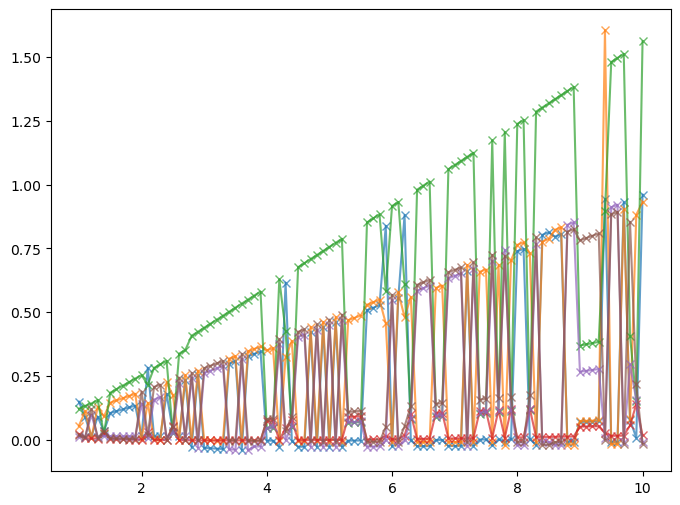

In [79]:
fig, ax = plt.subplots(figsize = (8, 6))
merged_compartments_list = [np.array([1, 2], dtype=np.int64),
                            np.array([1, 3], dtype=np.int64),
                            np.array([1, 4], dtype=np.int64),
                            np.array([2, 3], dtype=np.int64),
                            np.array([2, 4], dtype=np.int64),
                            np.array([3, 4], dtype=np.int64),
                           ]

for merged_compartments in merged_compartments_list:
    key = tuple(merged_compartments)
    ax.plot(Xs, [-f1+f2 for f1, f2 in list(zip(best_F_4To3[key], initial_F_4To3[key]))], label = f"{merged_compartments}", alpha = 0.7, marker = "x")


In [88]:
initial_guess_phis_4To3[key]

[array([[0.03504392, 0.26349139, 0.04491015, 0.65655454],
        [0.75738291, 0.09951605, 0.09951795, 0.04358309],
        [0.09951961, 0.04358326, 0.75737758, 0.09951956]]),
 array([[0.01504042, 0.04824257, 0.0335303 , 0.90318671],
        [0.77101599, 0.09538383, 0.09538534, 0.03821483],
        [0.09538825, 0.03821543, 0.77100813, 0.0953882 ]]),
 array([[0.37390955, 0.06327233, 0.04450839, 0.51830973],
        [0.03370932, 0.09192954, 0.09193032, 0.78243082],
        [0.09193387, 0.03371017, 0.78242204, 0.09193394]]),
 array([[0.01273979, 0.05332197, 0.03109219, 0.90284605],
        [0.79219168, 0.08896911, 0.08897041, 0.0298688 ],
        [0.08897237, 0.02986908, 0.79218622, 0.08897234]]),
 array([[0.06648731, 0.37703557, 0.04124204, 0.51523508],
        [0.02655879, 0.08638561, 0.08638629, 0.8006693 ],
        [0.08639052, 0.02655964, 0.80065932, 0.08639056]]),
 array([[0.01097128, 0.05707937, 0.02918201, 0.90276733],
        [0.80811175, 0.0841021 , 0.0841028 , 0.02368334],
    

In [81]:
def cosine_similarity(A, B):
    return np.dot(A.flatten(), B.flatten()) / (np.linalg.norm(A) * np.linalg.norm(B))

c = []
for idx in range(len(initial_guess_phis_4To3[key])):
    similarity = cosine_similarity(initial_guess_phis_4To3[key][idx], best_phis_4To3[key][idx])
    c.append(similarity)
    # print(f"Cosine similarity: {similarity:.4f}")

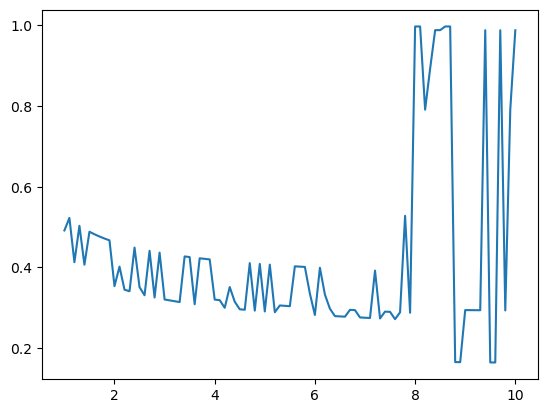

In [82]:
plt.plot(Xs, c)

In [21]:

norm_p = []
norm_e = []

for idx in range(len(initial_guess_phis_4To3[key])):
    frobenius_norm = np.linalg.norm(initial_guess_phis_4To3[key][idx]-best_phis_4To3[key][idx], 'fro')
    norm_p.append(frobenius_norm)
    norm = np.linalg.norm(initial_guess_etas_4To3[key][idx]-best_etas_4To3[key][idx], ord=2)
    norm_e.append(norm)

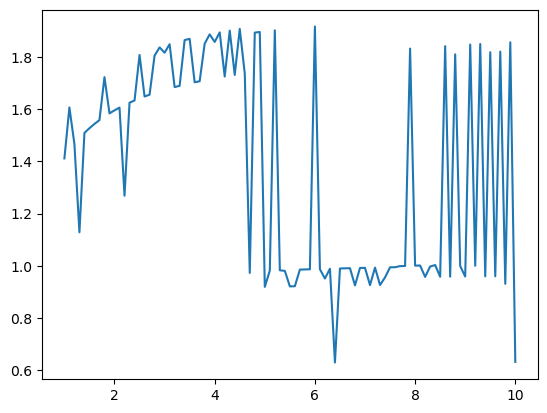

In [22]:
plt.plot(Xs, norm_p)

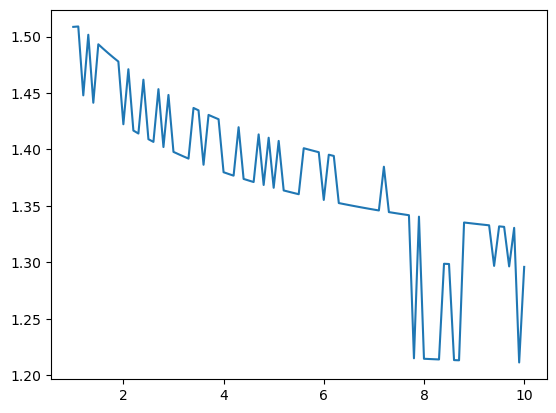

In [85]:
plt.plot(Xs, norm_e)
